In [1]:
import random
import csv
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Question 1, 2) 
# run this cell by changing the value of the number of days

def Q1_2(ndays):
    count = [0, 0, 0, 0]
    for i in range(ndays):
        x = random.uniform(0, 1)
        if x > 0.7:
            count[3] = count[3] + 1
            continue
        if x > 0.6:
            count[2] = count[2] + 1
            continue
        if x > 0.2:
            count[1] = count[1] + 1
            continue
        count[0] = count[0] + 1
    for i in range(len(count)):
        count[i] = float(count[i]/ndays)
    return count
Q1_2(100)

[0.3, 0.42, 0.07, 0.21]

In [3]:
def fetchData(path):
    # this method is used to fetch the data from the datasets folder and parse
    # the X and Y values in seperate arrays
    X = []
    Y = []
    with open(path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            X.append((float)(row[0]))
            Y.append((float)(row[1]))
    return X,Y

In [4]:
# this method is used when plotting the fits of the polynomials

def fittedPolynomial(weights, X):
    values = []
    for x in X:
        value = 0
        for i in range(21):
            value += weights[i] * math.pow(x,i)
        values.append(value)

    return values


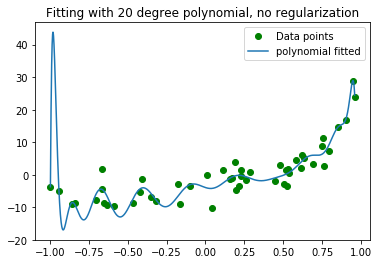

{'trainingError': 6.474733379982946, 'validationError': 1418.3916624664937}

In [5]:
# Question 2 
# 1)
# a) and b) plotting

def Q2_1_a():

    # we want to train a 20-degree polynomial, with no regularization
    trainX, trainY = fetchData("./Datasets/Dataset_1_train.csv")
    validX, validY = fetchData("./Datasets/Dataset_1_valid.csv")

    weights = np.ones(21)
    np.transpose(weights)

    # we want to create a data matrix
    # the ith line will be the powers of x(i) from 0 to 20

    # Data matrix will be for training, and DataMatrix2 for regularization
    DataMatrix = []

    # DataMatrix2 will be used to store all the validation data in same way we are storing the training data
    DataMatrix2 = []

    for i in range(len(trainX)):
        temp = []
        for k in range(21):
            temp.append(math.pow(trainX[i], k))
        DataMatrix.append(temp)

    for i in range(len(validX)):
        temp = []
        for k in range(21):
            temp.append(math.pow(validX[i], k))
        DataMatrix2.append(temp)

    X = np.array(DataMatrix)

    # here we want to find the weights that minimizes the error function
    # ie (X.T * X)^-1 * X.T * Y
    inv = np.linalg.inv(np.matmul(X.T, X))
    temp = np.matmul(inv, X.T)
    finalWeights = np.matmul(temp, trainY)  # this is the updated weights for a 20 degree polynomial

    # now we want to calculate the training error :
    predictedResult = np.matmul(DataMatrix, finalWeights)

    trainingError = 0
    for i in range(len(predictedResult)):
        trainingError = trainingError + math.pow(trainY[i] - predictedResult[i], 2)
    trainingError = trainingError / len(predictedResult)


    validError = 0
    predictedResult = np.matmul(DataMatrix2, finalWeights)
    for i in range(len(validX)):
        validError = validError + math.pow(validY[i] - predictedResult[i], 2)

    validError = validError / len(predictedResult)
    
    plt.title("Fitting with 20 degree polynomial, no regularization")
    plt.plot(trainX, trainY, 'go') #actual data points

    trainX = np.sort(trainX)
    T = np.arange(trainX[0], trainX[len(trainX) - 1], 0.001)
    plt.plot(T, fittedPolynomial(finalWeights, T))

    plt.legend(['Data points', 'polynomial fitted'])
    plt.show()

    return {"trainingError":trainingError, "validationError":validError}

Q2_1_a()

In [6]:
# this method trains a 20 degree polynomial with regularization, where the 'lambda' value
# used is the parameter taken by the method

def train20degPolyWithReg(value):

    # we want to train a 20-degree polynomial, with no regularization
    # we want to create a data matrix
    # the ith line will be the powers of x(i) from 0 to 20
    trainX, trainY = fetchData("./Datasets/Dataset_1_train.csv")
    validX, validY = fetchData("./Datasets/Dataset_1_valid.csv")
    testX, testY = fetchData("./Datasets/Dataset_1_test.csv")

    trainingData = []
    validData = []
    testData = []

    for i in range(len(trainX)):
        temp = []
        for k in range(21):
            temp.append(math.pow(trainX[i], k))
        trainingData.append(temp)

    for i in range(len(validX)):
        temp = []
        for k in range(21):
            temp.append(math.pow(validX[i], k))
        validData.append(temp)

    for i in range(len(testX)):
        temp = []
        for k in range(21):
            temp.append(math.pow(testX[i], k))
        testData.append(temp)

    X = np.array(trainingData)

    # We want to find the weights that minimize the error function (now containing the regularization parameter)

    lambdaMatrix = value * 20 * np.identity(21)
    inv = np.linalg.inv(np.matmul(X.T, X) + lambdaMatrix)
    temp = np.matmul(inv, X.T)
    final = np.matmul(temp, trainY) # this is the updated weights for a 20 degree polynomial
    normOfWeights = 0
    for i in range(len(final)):
        normOfWeights += math.pow(final[i], 2)

    # now we want to calculate the training error :
    predictedResult = np.matmul(trainingData, final)
    trainingError = 0
    for i in range(len(predictedResult)):
        trainingError += math.pow(trainY[i] - predictedResult[i], 2)
    trainingError = trainingError / len(predictedResult) + value * 0.5 * normOfWeights

    validError = 0
    predictedResult = np.matmul(validData, final)
    for i in range(len(validX)):
        validError = validError + math.pow(validY[i] - predictedResult[i], 2)

    validError = validError / len(predictedResult) + value * 0.5 * normOfWeights

    testError = 0
    predictedResult = np.matmul(testData, final)
    for i in range(len(testX)):
        testError = testError + math.pow(validY[i] - predictedResult[i], 2)

    testError = testError / len(predictedResult) + value * 0.5 * normOfWeights
    
    return final, trainingError, validError, testError


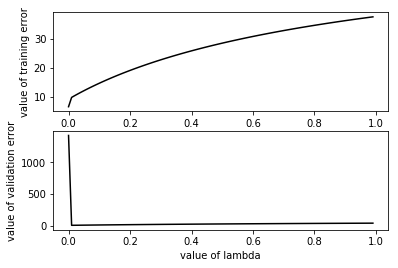

{0.0: 1418.3916624664937,
 0.01: 10.037853801976093,
 0.02: 10.699202831633928,
 0.029999999999999999: 11.315733780617837,
 0.040000000000000001: 11.911030075889336,
 0.050000000000000003: 12.491396939407787,
 0.059999999999999998: 13.059371018637481,
 0.070000000000000007: 13.616285481209108,
 0.080000000000000002: 14.162986853905032,
 0.089999999999999997: 14.70008802909015,
 0.10000000000000001: 15.228073415621191,
 0.11: 15.747348466990887,
 0.12: 16.258265511031333,
 0.13: 16.761138432923698,
 0.14000000000000001: 17.25625166730687,
 0.14999999999999999: 17.743866073693418,
 0.16: 18.22422299674006,
 0.17000000000000001: 18.697547209950674,
 0.17999999999999999: 19.164049138022005,
 0.19: 19.623926592203699,
 0.20000000000000001: 20.077366163720107,
 0.20999999999999999: 20.524544368583335,
 0.22: 20.96562860602625,
 0.23000000000000001: 21.400777973420759,
 0.23999999999999999: 21.830143968099485,
 0.25: 22.253871098255612,
 0.26000000000000001: 22.67209741948529,
 0.270000000000

In [7]:
# Question 2
# 2)
# a)

def Q2_2_a():
    #this method will test different values of lambda and plot the training errors and validation errors
    T = np.arange(0,1,0.01)
    training = []
    validation = []
    errorForLambdaValue = {}
    for value in T:
        weights,trainingError,validError,testError = train20degPolyWithReg(value)
        training.append(trainingError)
        validation.append(validError)
        errorForLambdaValue[value] = validError

    # now we want to plot training error and validation error against lambda
    plt.figure(1)
    plt.subplot(211)
    plt.plot(T, training, 'k')
    plt.xlabel("value of lambda")
    plt.ylabel("value of training error")
    plt.subplot(212)
    plt.plot(T, validation,'k')
    plt.xlabel("value of lambda")
    plt.ylabel("value of validation error")
    plt.show()

    return errorForLambdaValue

Q2_2_a()

In [8]:

def regressionWithGradientDescent(alpha):
    trainX, trainY = fetchData("./Datasets/Dataset_2_train.csv")
    validX, validY = fetchData("./Datasets/Dataset_2_valid.csv")
    testX, testY = fetchData("./Datasets/Dataset_2_test.csv")

    plt.plot(trainX, trainY, 'ro')

    validMSE = []
    trainingMSE = []
    testMSE = []
    epoch = []
    w0 = 1
    w1 = 1


    # we want to iterate through values of alpha and decide
    # which is the best value depending on validation MSE

    predictionsPerEpoch = []  # this will keep track of the fits after every epoch
    k = 0
    while True:
        T = np.arange(0,len(trainX))
        np.random.shuffle(T)  # we shuffle the order in which we go through the data points
        epoch.append(k)
        w0_old = w0  # we keep track of the old weights, in order to have a stop parameter
        w1_old = w1

        # we go through every element of the training set, and update the weights
        for i in T:
            guess = w0 + trainX[i]*w1
            w0 = w0 - alpha*(guess-trainY[i])
            w1 = w1 - alpha*(guess - trainY[i])*trainX[i]

        X = np.array(trainX)
        Y_values = w0 + X*w1
        predictionsPerEpoch.append(Y_values)

        # here we calculate the MSE for this epoch
        error = 0
        for i in range(len(validX)):
            guess = w0 + validX[i]*w1
            error += math.pow((guess - validY[i]), 2)
        validMSE.append(error/len(validY))
        error = 0

        for i in range(len(trainX)):
            guess = w0 + trainX[i]*w1
            error += math.pow((guess - trainY[i]), 2)
        trainingMSE.append(error/len(trainX))

        error = 0
        for i in range(len(testX)):
            guess = w0 + testX[i] * w1
            error += math.pow((guess - testY[i]), 2)
        testMSE.append(error / len(testX))

        if k > 10000:
            # this check is to prevent models from diverging (ie when alpha is too large)
            print("stopped")
            break

        # we stop if the the error does not change more thant 10^-4
        if len(validMSE) > 2 and math.fabs(validMSE[len(validMSE)-1] - validMSE[len(validMSE)-2]) < math.pow(10,-4):
            break

        k += 1

    return epoch, validMSE, trainingMSE, testMSE, predictionsPerEpoch


all MSE on validation set after each epoch


[28.052102684018646,
 28.02452981137801,
 27.996984248968573,
 27.969465983215763,
 27.94197499344057,
 27.914511251259697,
 27.887074683923142,
 27.859665330956567,
 27.83228311070809,
 27.80492803301573,
 27.77760001862218,
 27.75029908696769,
 27.723025226780848,
 27.69577840515475,
 27.66855857593367,
 27.64136570404635,
 27.614199774995537,
 27.587060765475403,
 27.559948639310083,
 27.532863388434034,
 27.505804929881148,
 27.478773330982314,
 27.451768457352163,
 27.4247903672043,
 27.39783898362292,
 27.370914314579995,
 27.344016307527976,
 27.317144955865913,
 27.29030022230162,
 27.263482080124167,
 27.23669049972999,
 27.2099254890313,
 27.183186991134086,
 27.156474961863886,
 27.129789426681683,
 27.103130297744446,
 27.076497564988347,
 27.04989124865816,
 27.02331129708587,
 26.996757671131327,
 26.970230351731196,
 26.943729330872056,
 26.917254563269115,
 26.890806012636602,
 26.86438364325217,
 26.837987481781525,
 26.81161747097691,
 26.7852735679679,
 26.7589557427

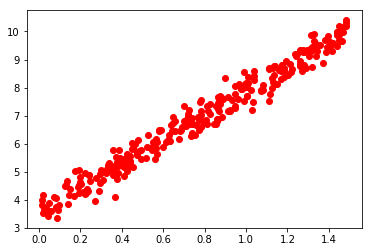

In [9]:
# Question 3 
# 1)
# a)

def Q3_1_a():
    epoch, validMSE, trainingMSE, testMSE, fits = regressionWithGradientDescent(math.pow(10, -6))
    print("all MSE on validation set after each epoch")
    return validMSE

Q3_1_a()

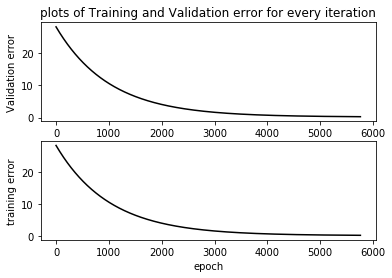

In [10]:
# Question 3 
# 1)
# b)

def Q3_1_b():
    # here we compute the validation error for each epoch

    epoch, validMSE, trainingMSE, testMSE, fits = regressionWithGradientDescent(math.pow(10, -6))

    # and we then plot the training error and the validation error for each epoch

    plt.subplot(211)
    plt.title("plots of Training and Validation error for every iteration")
    plt.ylabel("Validation error")
    plt.xlabel("epoch")
    plt.plot(epoch, validMSE, 'k')
    plt.subplot(212)
    plt.ylabel("training error")
    plt.plot(epoch, trainingMSE, 'k')
    plt.xlabel("epoch")
    plt.show()

Q3_1_b()


smallest validation mse was found for alpha value : 
0.131072
the corresponding test error is :
0.07231744217697625


[array([  8.6113046 ,   6.39764648,   7.64870402,   7.12805406,
          9.71559784,   3.87274904,   3.96513254,   7.40848712,
          8.18500142,   7.26553946,   8.66905595,   4.50295774,
         10.13619392,   7.1250769 ,  10.02815836,   9.94387902,
          4.27888677,   5.90773671,   5.45430004,   4.93904995,
          8.01901401,   8.07142924,   5.67406254,   4.0055724 ,
          5.3283205 ,   5.09716339,   6.71180229,   5.44945634,
          6.88155801,   5.95178182,   9.15359348,   5.76252704,
          7.94388246,   7.57411311,   8.50104494,   6.40158188,
          4.54034063,   6.38096507,   6.48727725,   4.22600223,
          5.29738556,   6.96016571,   5.27567013,   6.19272188,
          9.2538912 ,   4.66955663,   8.3378541 ,   7.67595818,
          8.90606253,   7.16734227,   8.18906222,   7.46226819,
          6.93575935,   6.2342107 ,   5.23827175,   9.75214207,
          5.63061894,   8.78417724,   5.37028763,   7.51431688,
          5.00984677,   9.47882791,   9.

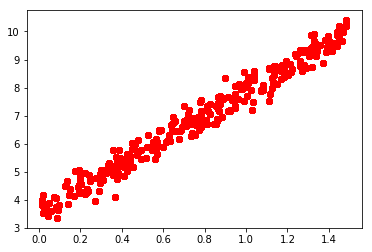

In [11]:
# Question 3 
# 2)
# b)

def Q3_2_b():
    # In this method, we will go through different values of alpha
    # and select the one that minimizes the validation MSE

    alpha = math.pow(10, -6)
    file = open("alpha_validMSE.txt", "w")  # we use this file to store the MSE for all different values of alpha
    minValidationError = 1
    associatedTestError = 0
    alphaValue = 0
    predictionsForAlphaValue = []
    while alpha < 0.5:
        epoch, validMSE, trainingMSE, testMSE, predictions = regressionWithGradientDescent(alpha)
        # we find the minimal validation MSE error found
        index = np.argmin(validMSE)
        if validMSE[index] < minValidationError:
            minValidationError = validMSE[index]
            associatedTestError = testMSE[index]
            alphaValue = alpha
            predictionsForAlphaValue = predictions

        file.write(str(alpha) + " --  " + str(validMSE))
        file.write('\n')
        alpha = alpha * 2
        # if alpha > 0.01:
        #     alpha = alpha * 1.5
        # else:
        #     alpha = alpha * 2
    file.close()

    print("smallest validation mse was found for alpha value : ")
    print(alphaValue)
    # and we want to get the test error for this specific value of alpha
    print("the corresponding test error is :")
    print(associatedTestError)

    # and we return all the predictions found after each epoch using this specific alpha value
    return predictionsForAlphaValue

Q3_2_b()


smallest validation mse was found for alpha value : 
0.131072
the corresponding test error is :
0.07237602646461128


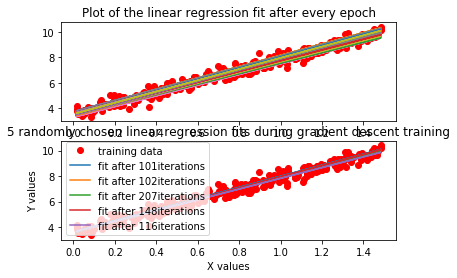

In [12]:
# Question 3 
# 3)

def Q3_3():
    # this method will produce 2 subplots :
    # 1) the fit after every epoch
    # 2) 5 randomly chosen fits to show the progression of the fit
    trainX, trainY = fetchData("./Datasets/Dataset_2_train.csv")
    predictionsForAlphaValue = Q3_2_b()

    plt.subplot(211)
    plt.title("Plot of the linear regression fit after every epoch")
    plt.plot(trainX,trainY, 'ro')
    for i in range(len(predictionsForAlphaValue)):
        plt.plot(trainX, predictionsForAlphaValue[i])

    plt.subplot(212)
    plt.title("5 randomly chosen linear regression fits during gradient descent training")
    plt.plot(trainX,trainY, 'ro')
    legends = ["training data"]
    for i in range(5):
        index1 = random.randint(0, len(predictionsForAlphaValue)-1)
        plt.plot(trainX, predictionsForAlphaValue[index1])
        del predictionsForAlphaValue[index1]
        legends.append("fit after " + str(index1) + "iterations")


    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.legend(legends)
    plt.show()
    
Q3_3()

In [13]:
# Question 4
# 1)
# a)


def Q4_1_a():
    # need to fetch the data and update the missing values with the sample mean of each column

    dataMatrix = []
    with open('./communities.data.csv', 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            dataMatrix.append(row)

    # now we're going to fetch the sample mean of each column (except the 4rd column as it is the comunity name)
    sampleMeans = []
    sampleMedians = []
    for i in range(len(dataMatrix[0])):
        if i == 3:  # 4th column
            continue
        temp = 0
        counter = 0
        column = []
        for k in range(len(dataMatrix)):
            if dataMatrix[k][i] != '?':
                column.append(float(dataMatrix[k][i]))
                temp += float(dataMatrix[k][i])
                counter += 1
        column = np.sort(column)
        sampleMedians.append(column[int(len(column)/2)])
        sampleMeans.append(temp/counter)

    # now we replace each '?' with the sample median from that column
    for i in range(len(dataMatrix[0])):
        if i == 3:
            continue
        for k in range(len(dataMatrix)):
            if dataMatrix[k][i] == '?':
                # dataMatrix[k][i] = sampleMeans[i]
                dataMatrix[k][i] = sampleMedians[i]
    file = open("completedData.csv", 'w')
    writer = csv.writer(file)
    for k in range(len(dataMatrix)):
        writer.writerow(dataMatrix[k])
    file.close()

Q4_1_a()


In [14]:
# this is a helper method to create and store the 80-20 splits

def create80_20Split(data):
    cutoff = int(0.8*len(data))
    for i in range(5):
        # we also remove the first 5 columns as they are not used for prediction
        np.random.shuffle(data)
        training = data[:cutoff-1]
        test = data[cutoff:]
        file = open("CandC-train" + str(i+1) + ".csv", 'w')
        writer = csv.writer(file)
        for row in training:
            writer.writerow(row[5:])
        file.close()

        file = open("CandC-test" + str(i+1) + ".csv", 'w')
        writer = csv.writer(file)

        # we remove the first 5 columns, as they are not used for prediction
        for row in test:
            writer.writerow(row[5:])
        file.close()


In [15]:
# helper method to perform a linear regression with lambda value as parameter


def linearRegression(value):
    # this method will be used to fit a model to the data present in the CandC sets
    # it takes as parameter the Lambda value for regularization ( 0 in case of no regularization)

    # for each 80- 20 data set, we want to fit a linear model and calculate
    # the MSE for the corresponding test set
    errorSum = 0
    weights = []
    for i in range(5):
        trainingX = []
        trainingY = []
        testX = []
        testY = []
        file = open("CandC-train" + str(i+1) + ".csv", 'r')
        reader = csv.reader(file)
        for row in reader:
            temp = []
            for k in range(len(row) - 1):
                temp.append(float(row[k]))
            trainingX.append(temp)
            trainingY.append(float(row[len(row) - 1]))  # the 'Y' element is present on the last column
        file.close()
        file = open("CandC-test" + str(i+1) + ".csv", 'r')
        reader = csv.reader(file)
        for row in reader:
            temp = []
            for k in range(len(row) - 1):
                temp.append(float(row[k]))
            testX.append(temp)
            testY.append(float(row[len(row) - 1]))

        X = np.array(trainingX)
        inv = np.linalg.inv(np.matmul(X.T, X) + value*np.identity(len(X.T)))
        temp = np.matmul(inv, X.T)
        finalW = np.matmul(temp, trainingY)
        weights.append(finalW)  # we add the weights of the model for the ith split

        # now we want to calculate the MSE of the test error
        totalError = 0
        for k in range(len(testX)):
            prediction = np.matmul(testX[k], finalW)
            totalError += math.pow(prediction - testY[k], 2)
        errorSum += totalError/len(testX)
        # we store the error value found fot this lambda value

    # and we average it out over the 5 splits

    averageError = errorSum/5

    # we return the weights that have been learned for each of the splits and the average error associated

    return weights, averageError


In [16]:
# Question 4
# 2)

def Q4_2():
    # we go fetch the completed data
    dataMatrix = []
    with open('./completedData.csv', 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            dataMatrix.append(row)

    create80_20Split(dataMatrix)  # if the splits have not been created we recreate them
    weights, error = linearRegression(0)  # we then call the linearRegression method with a lambda value of 0
    print("average error found for linear regression w/o regularization : ")
    print(error)

Q4_2()


average error found for linear regression w/o regularization : 
0.019914829053174786


min error is : 0.01786819809096988
obtained at lambda : 0.95


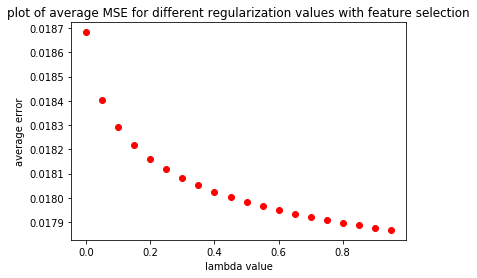

0.95000000000000007

In [17]:
# Question 4
# 3)
# a)

def Q4_3_a(plotGraph = True, dataIsSet=False):
    # the 2 optional parameters are here in order to be able to reuse the code
    # in this method without performing some of the tasks (ie recreate the splits)
    # or plot a certain graph
    
    if not(dataIsSet):
        data = []
        with open('./completedData.csv', 'r') as file:
            reader = csv.reader(file)
            for row in reader:
                data.append(row)

        create80_20Split(data)  # if the splits have not been created we recreate them
    T = np.arange(0, 1, 0.05)  # these will be the lambda value we will be testing on
    tempMin = 1
    valueForMin = 0
    weightsForMin = []
    errors = []
    for value in T:
        weights, error = linearRegression(value)
        errors.append(error)
        if error < tempMin:
            tempMin = error
            valueForMin = value
            weightsForMin = weights

    print("min error is : " + str(tempMin))
    print("obtained at lambda : " + str(valueForMin))
    if plotGraph:
        # and then we plot the average errors obtained for each of the lambda values tested
        plt.title("plot of average MSE for different regularization values with feature selection")
        plt.plot(T, errors, 'ro')
        plt.xlabel("lambda value")
        plt.ylabel("average error")
        plt.show()
    file = open("weightsForMinValue.csv", 'w')
    writer = csv.writer(file)
    for i in range(len(weightsForMin)):
        writer.writerow(weightsForMin[i])
    file.close()
    #each row will represent the weights for one of the 5 slipts
    
    # and we return the lambda value that lead to the lowest error, along with the weights associated
    return valueForMin

Q4_3_a()


In [ ]:
# Question 4
# 3)
# c)

def Q4_3_c():

    # we fetch the weights of the model that will be selected
    # we pass the original data (which gets completed by the Q4_1_a() method
    value = Q4_3_a(plotGraph=False)
    
    w = []
    # we go fetch the weights that we stored in a csv file
    file = open("weightsForMinValue.csv", 'r')
    reader = csv.reader(file)
    for row in reader:
        temp = []
        for k in range(len(row)):
            temp.append(float(row[k]))
        w.append(temp)

    # Then we choose which features we want to keep
    featuresToKeep = []
    weights = np.array(w)
    # here weights is an array of the 5 different weights of the models, take the one that had the smallest error?
    sumOfWeights = np.sum(weights, axis=0)
    for j in range(len(sumOfWeights)):
        if math.fabs(sumOfWeights[j]/5) > 0.05 :
            featuresToKeep.append(j + 5)  # to take in account the first 5 columns we had removed previously

    # Then we go to the completed data and keep only those features, storing all this in a new csv file
    print("kept " + str(len(featuresToKeep)) + " features")
    file = open('completedData.csv', 'r')
    file2 = open('selectedFeatures.csv', 'w')
    writer = csv.writer(file2)
    reader = csv.reader(file)
    data = []
    for row in reader:
        tempRow = []
        for k in range(len(row)):
            if k in featuresToKeep:
                tempRow.append(row[k])
        data.append(tempRow)
        writer.writerow(tempRow)
    file.close()
    file2.close()

    # and now we can test the model with the selected features by
    # calling the regression method and passing the updated data
    # this will print the minimal error found and will plot the the values of errors depending on lambda

    # we first create the 5 80-20 splits of the new data
    create80_20Split(data)

    # and then we call the linear regression method, passing the 'best' lambda value found previously
    Q4_3_a(dataIsSet=True)

Q4_3_c()

min error is : 0.017956868393704972
obtained at lambda : 0.95
kept 55 features
